In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
%matplotlib inline

In [2]:
Country1 = "USA"  
Country2 = "BRA"  
Country3 = "MEX"
Country4 = "IND"  


In [3]:
covid19Data = pd.read_csv("https://raw.githubusercontent.com/WhipSnake23/Python-Class-Project/main/Data/owid-covid-data.csv")

#scrub data from rolled up rows for each region globally. NOTE: ~=="not"
covid19Data = covid19Data[~covid19Data.iso_code.str.contains("OWID")]
covid19DataCountry1= covid19Data[(covid19Data["iso_code"] == Country1)]
covid19DataCountry2= covid19Data[(covid19Data["iso_code"] == Country2)]
covid19DataCountry3= covid19Data[(covid19Data["iso_code"] == Country3)]
covid19DataCountry4= covid19Data[(covid19Data["iso_code"] == Country4)]

covid19DataCountry1.insert(0,'YearMonth',pd.to_datetime(covid19DataCountry1['date']).dt.to_period('M'))
covid19DataCountry2.insert(0,'YearMonth',pd.to_datetime(covid19DataCountry2['date']).dt.to_period('M'))
covid19DataCountry3.insert(0,'YearMonth',pd.to_datetime(covid19DataCountry3['date']).dt.to_period('M'))
covid19DataCountry4.insert(0,'YearMonth',pd.to_datetime(covid19DataCountry4['date']).dt.to_period('M'))

country1Deaths=covid19DataCountry1.groupby(['YearMonth'], as_index=False).agg(total_deaths1=('total_deaths', sum))
country2Deaths=covid19DataCountry2.groupby(['YearMonth'], as_index=False).agg(total_deaths2=('total_deaths', sum))
country3Deaths=covid19DataCountry3.groupby(['YearMonth'], as_index=False).agg(total_deaths3=('total_deaths', sum))
country4Deaths=covid19DataCountry4.groupby(['YearMonth'], as_index=False).agg(total_deaths4=('total_deaths', sum))

deathsByPeriod = pd.concat([country1Deaths['total_deaths1'], country2Deaths['total_deaths2'],
                            country3Deaths['total_deaths3'], country4Deaths['total_deaths4']]
                           , axis=1,join='outer')

#print(f"{deathsByPeriod}")

In [4]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

In [5]:
deathsByPeriod['total_deaths1'] = deathsByPeriod['total_deaths1'].div(1000).round(0)
deathsByPeriod['total_deaths2'] = deathsByPeriod['total_deaths2'].div(1000).round(0)
deathsByPeriod['total_deaths3'] = deathsByPeriod['total_deaths3'].div(1000).round(0)
deathsByPeriod['total_deaths4'] = deathsByPeriod['total_deaths4'].div(1000).round(0)
print(f"{deathsByPeriod}")

    total_deaths1  total_deaths2  total_deaths3  total_deaths4
0             0.0            0.0            0.0            0.0
1             0.0            1.0            0.0            0.0
2            26.0           67.0            0.0            0.0
3          1071.0          509.0           19.0           14.0
4          2806.0         1353.0          165.0           94.0
5          3582.0         2370.0          563.0          332.0
6          4339.0         3345.0         1164.0          813.0
7          5282.0         4004.0         1749.0         1582.0
8          5902.0         4733.0         2150.0         2477.0
9          6812.0         4986.0         2649.0         3481.0
10         7523.0         5703.0         2963.0         3910.0
11         9697.0         6484.0         3594.0         4468.0
12        12432.0         4954.0         4367.0         4714.0
13        10027.0            NaN         3579.0         3264.0


array([[<AxesSubplot:title={'center':'Deaths in USA (1000s)'}>,
        <AxesSubplot:title={'center':'Deaths in BRA (1000s)'}>],
       [<AxesSubplot:title={'center':'Deaths in MEX (1000s)'}>,
        <AxesSubplot:title={'center':'Deaths in IND (1000s)'}>]],
      dtype=object)

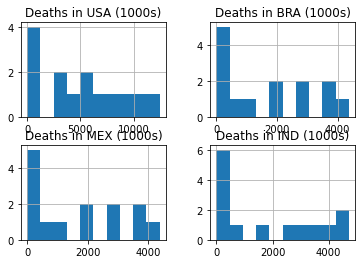

In [6]:
#plt.subplots(figsize=(12,12)) 
histrogramOfDeaths = pd.DataFrame({
    'Deaths in USA (1000s)' : deathsByPeriod['total_deaths1'], 
    'Deaths in BRA (1000s)': deathsByPeriod['total_deaths3'], 
    'Deaths in MEX (1000s)': deathsByPeriod['total_deaths3'], 
    'Deaths in IND (1000s)': deathsByPeriod['total_deaths4'] 
    })

histrogramOfDeaths.hist()


(array([[4., 0., 2., 1., 2., 1., 1., 1., 1., 1.],
        [4., 2., 1., 3., 2., 1., 0., 0., 0., 0.],
        [7., 2., 4., 1., 0., 0., 0., 0., 0., 0.],
        [7., 2., 2., 3., 0., 0., 0., 0., 0., 0.]]),
 array([    0. ,  1243.2,  2486.4,  3729.6,  4972.8,  6216. ,  7459.2,
         8702.4,  9945.6, 11188.8, 12432. ]),
 <a list of 4 BarContainer objects>)

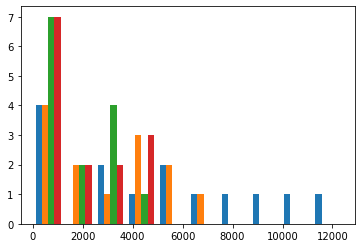

In [7]:
plt.hist([deathsByPeriod['total_deaths1'], 
          deathsByPeriod['total_deaths2'],
          deathsByPeriod['total_deaths3'],
          deathsByPeriod['total_deaths4']
         ])

(array([4., 0., 1., 1., 0., 1., 1., 3., 1., 1.]),
 array([   0. ,  648.4, 1296.8, 1945.2, 2593.6, 3242. , 3890.4, 4538.8,
        5187.2, 5835.6, 6484. ]),
 <BarContainer object of 10 artists>)

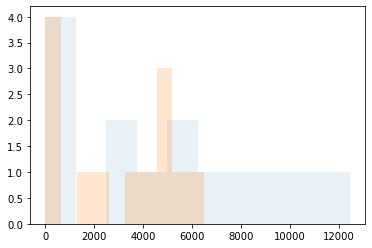

In [8]:
plt.hist(deathsByPeriod['total_deaths1'], alpha=0.1)
plt.hist(deathsByPeriod['total_deaths2'], alpha=0.2)
